# NEURON's `hh` modfile

In [2]:
import sys
sys.path.append("../../")

import numpy as np
import matplotlib.pyplot as plt

from act.modfiles import vtrap, fit_boltzmann

In [3]:
# For convenience
def boltzmann(v, vhalf, k):
    return 1.0 / (1.0 + np.exp(-(v - vhalf) / k))

## Na

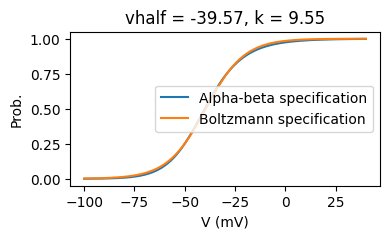

In [4]:
# Copied from the modfile
def Na(v):
    alpha = .1 * vtrap(-(v+40),10)
    beta =  4 * np.exp(-(v+65)/18)
    sum = alpha + beta
    minf = alpha/sum
    return minf

# Fit Boltzmann
v = np.linspace(-100, 40, 1000)
vhalf, k = fit_boltzmann(v, Na(v))

# Plot to check
plt.figure(figsize = (4, 2))
plt.plot(v, Na(v), label = "Alpha-beta specification")
plt.plot(v, boltzmann(v, vhalf, k), label = "Boltzmann specification")
plt.xlabel("V (mV)")
plt.ylabel("Prob.")
plt.title(f"vhalf = {round(vhalf, 2)}, k = {round(k, 2)}")
plt.legend();

Update the modfile...

## K

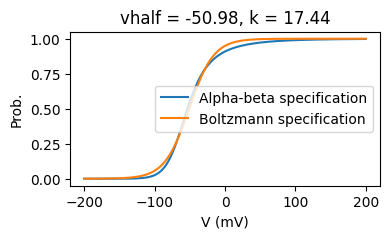

In [5]:
def K(v):
    alpha = .01*vtrap(-(v+55),10) 
    beta = .125*np.exp(-(v+65)/80)
    sum = alpha + beta
    ninf = alpha/sum
    return ninf

# Fit Boltzmann
v = np.linspace(-200, 200, 1000)
vhalf, k = fit_boltzmann(v, K(v))

# Plot to check
plt.figure(figsize = (4, 2))
plt.plot(v, K(v), label = "Alpha-beta specification")
plt.plot(v, boltzmann(v, vhalf, k), label = "Boltzmann specification")
plt.xlabel("V (mV)")
plt.ylabel("Prob.")
plt.title(f"vhalf = {round(vhalf, 2)}, k = {round(k, 2)}")
plt.legend();

Update the modfile...